In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Align_Liver_HW_2h_L1_Liver_HW_2h_L2.txt",header=None)
L11=np.array(data.iloc[list(range(0,data.shape[0],2)),0])
L2=np.array(data.iloc[list(range(1,data.shape[0],2)),0])

tempdata1=pd.DataFrame()
tempdata1["L1"]=[int(x*60*100) for x in L11]
tempdata1["L2"]=[int(x*60*100) for x in L2]
print(tempdata1.shape)
tempdata1.head()

(11522, 2)


,L1,L2
0,44,45
1,68,68
2,109,99
3,134,123
4,155,143


In [3]:
# chrom1.dtypes

In [4]:
chrom1=pd.read_csv("chrom1.txt")
chrom2=pd.read_csv("chrom2.txt")
chrom1["Time"]=[int(100*60*x) for x in chrom1.Time]
chrom2["Time"]=[int(100*60*x) for x in chrom2.Time]
print(chrom1.shape,chrom2.shape)
chrom1.head()

(69644, 2) (69535, 2)


,Time,Intensity
0,13,3.690434e+04
1,44,1.327102e+07
2,68,1.245245e+07
3,81,8.779101e+03
4,96,1.949144e+04


In [5]:
merged=tempdata1.merge(chrom1,left_on="L1",right_on="Time")[["L1","L2","Intensity"]]
merged=merged.merge(chrom2,left_on="L2",right_on="Time")
print(merged.shape)
merged.head(10)

(10175, 5)


,L1,L2,Intensity_x,Time,Intensity_y
0,44,45,13271018.0,45,7403568.5
1,68,68,12452447.0,68,7474160.0
2,109,99,13270983.0,99,7199009.5
3,134,123,14569909.0,123,7279115.5
4,155,143,14632015.0,143,6995032.5
5,216,173,14615248.0,173,7378046.5
6,236,198,13891212.0,198,7691857.5
7,257,218,14094648.0,218,7954894.0
8,277,239,15511293.0,239,8225541.0
9,298,260,14569124.0,260,8076838.5


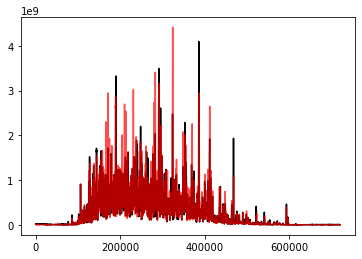

In [6]:
plt.plot(merged.L1,merged.Intensity_x,c='k')
plt.plot(merged.L2,merged.Intensity_y,alpha=0.7,c='r')
plt.rc('font', size=20) 

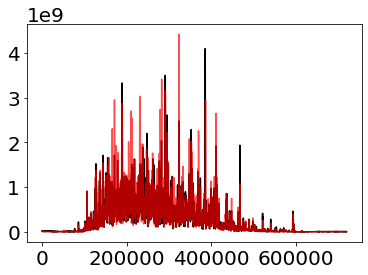

In [7]:
plt.plot(merged.L1,merged.Intensity_x,c='k')
plt.plot(merged.Time,merged.Intensity_y,alpha=0.7,c='r')